In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="windows-1252")

In [2]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [3]:
yes_no = {
    "Yes": True,
    "No": False
}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [4]:
import numpy as np
seen = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

In [5]:
for column in star_wars.columns[3:9]:
    star_wars[column] = star_wars[column].map(seen)

In [6]:
star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", "Unnamed: 4": "seen_2", "Unnamed: 5": "seen_3", "Unnamed: 6": "seen_4", "Unnamed: 7": "seen_5", "Unnamed: 8": "seen_6"})

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film": "ranking_epI",
                                     "Unnamed: 9": "ranking_ep2",
                                     "Unnamed: 10": "ranking_ep3",
                                     "Unnamed: 11": "ranking_ep4",
                                     "Unnamed: 12": "ranking_ep5",
                                     "Unnamed: 13": "ranking_ep6"})

In [11]:
mean_rankings = pd.Series()
mean_rankings = star_wars[star_wars.columns[9:15]].mean(axis=0)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

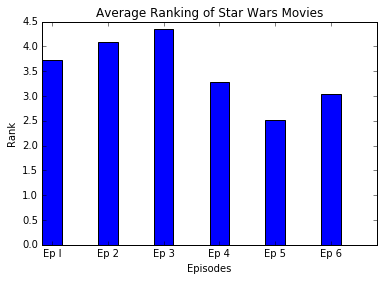

In [13]:
ind = np.arange(6)
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(ind, mean_rankings, width)
ax.set_ylabel("Rank")
ax.set_xlabel("Episodes")
ax.set_title("Average Ranking of Star Wars Movies")
ax.set_xticks(0.5*width+ind)
ax.set_xticklabels(("Ep I", "Ep 2", "Ep 3", "Ep 4", "Ep 5", "Ep 6"))
plt.show()

From the average ranking data, considering that 1 is the best score and 6 is the worst, most people prefer "The Empire Strikes Back" and strongly dislike "Revenge of the Sith"

In [14]:
sum_views = pd.Series()
sum_views = star_wars[star_wars.columns[3:9]].sum(axis=0)

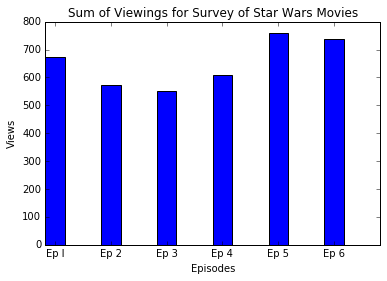

In [15]:
ind = np.arange(6)
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(ind, sum_views, width)
ax.set_ylabel("Views")
ax.set_xlabel("Episodes")
ax.set_title("Sum of Viewings for Survey of Star Wars Movies")
ax.set_xticks(0.5*width+ind)
ax.set_xticklabels(("Ep I", "Ep 2", "Ep 3", "Ep 4", "Ep 5", "Ep 6"))
plt.show()

More people have seen episode 5, and fewer people have seen episode 3. This would affect the ratings of those movies, surely.

In [16]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] != True]